In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal

matplotlib.rcParams['figure.dpi'] = 100

In [4]:
samplerate, wav = wavfile.read('chicks/audio/0.wav')
wav.shape

(2880000,)

In [10]:
samplerate

48000

In [16]:
# Spectrogram

# load the long audio file

#samplerate, wav2 = wavfile.read('chicks/audio/0.wav')
#wav = wav2[:,0]
#wav.shape
#wav = wav[:1000000]

In [5]:
# Google Spectrogram

fs = samplerate  # Sample rate
nperseg = 1024  # Number of samples per segment
noverlap = nperseg // 2  # Overlap between segments
nfft = 4096  # Number of points in FFT
# Calculate the spectrogram
f, t, Sxx = signal.spectrogram(wav, fs=fs, window='hann', nperseg=nperseg, noverlap=noverlap, nfft=nfft)
# Plot the spectrogram
#plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='inferno')

In [6]:
Sxx.shape

(2049, 5624)

In [7]:
f.shape, t.shape

((2049,), (5624,))

(5624,)


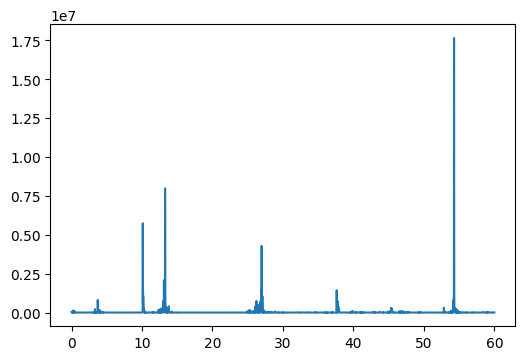

In [10]:
total = np.sum(Sxx, axis=0)
print(total.shape)
plt.plot(t, total)

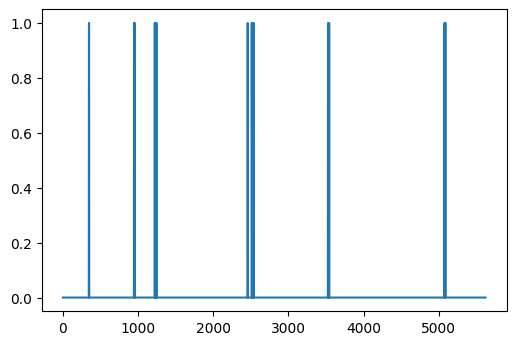

In [11]:
th = (total > 0.05 * 1e7).astype(np.float32)
plt.plot(th)

In [12]:
switches = np.concatenate(([0], np.where(np.diff(th) != 0)[0]+1, [len(th)]))

# create a list of ranges for each segment of continuous 1s
ranges = [(switches[i], switches[i+1]-1) for i in range(len(switches)-1) if th[switches[i]] == 1]

In [13]:
ranges

[(346, 349),
 (946, 950),
 (952, 954),
 (1222, 1223),
 (1228, 1229),
 (1231, 1232),
 (1234, 1234),
 (1242, 1247),
 (2458, 2459),
 (2513, 2513),
 (2521, 2522),
 (2524, 2524),
 (2527, 2529),
 (2531, 2533),
 (2537, 2538),
 (3526, 3527),
 (3541, 3542),
 (5075, 5077),
 (5085, 5090)]

In [15]:
# t: time offset

i = 0
for (begin, end) in ranges:
    print(begin,end)
    seg = th[begin:(end+1)]
    begin_time = t[begin]
    end_time = t[end+1]
    print(begin_time, end_time)
    
    off_begin = round(begin_time * samplerate)
    off_end = round(end_time * samplerate)
    print(off_begin, off_end)
    
    audio_segment = wav[off_begin:off_end]
    wavfile.write("segments/audio_seg%d.wav" % i, samplerate, seg)
    i = i + 1

346 349
3.7013333333333334 3.744
177664 179712
946 950
10.101333333333333 10.154666666666667
484864 487424
952 954
10.165333333333333 10.197333333333333
487936 489472
1222 1223
13.045333333333334 13.066666666666666
626176 627200
1228 1229
13.109333333333334 13.130666666666666
629248 630272
1231 1232
13.141333333333334 13.162666666666667
630784 631808
1234 1234
13.173333333333334 13.184
632320 632832
1242 1247
13.258666666666667 13.322666666666667
636416 639488
2458 2459
26.229333333333333 26.250666666666667
1259008 1260032
2513 2513
26.816 26.826666666666668
1287168 1287680
2521 2522
26.901333333333334 26.922666666666668
1291264 1292288
2524 2524
26.933333333333334 26.944
1292800 1293312
2527 2529
26.965333333333334 26.997333333333334
1294336 1295872
2531 2533
27.008 27.04
1296384 1297920
2537 2538
27.072 27.093333333333334
1299456 1300480
3526 3527
37.62133333333333 37.64266666666666
1805824 1806848
3541 3542
37.781333333333336 37.80266666666667
1813504 1814528
5075 5077
54.144 54.176